In [2]:
import sklearn
import tensorflow as tf

In [3]:
print("Sklearn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)

Sklearn version: 1.3.2
TensorFlow version: 2.14.1


In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Perceptron

In [4]:
# Simple example using the perceptron class from sklearn

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris Setosa

perceptron_clf = Perceptron(random_state=42)
perceptron_clf.fit(X, y)

X_new = np.array([[1.5, 0.2], [5.5, 1.8]])
y_pred = perceptron_clf.predict(X_new)
y_pred

array([ True, False])

# Regression MLPs

In [12]:
# Simple example of regression using an MLP on California Housing Data

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [9]:
# Load data
housing = fetch_california_housing()


# Split in train, test and val (2 splits)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, random_state=42
)

# Model
mlp_reg = MLPRegressor(
    hidden_layer_sizes=[50, 50, 50],
    random_state=42
)

In [13]:
# Pipeline
pipeline = make_pipeline(
    StandardScaler(),
    mlp_reg
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)

In [14]:
rmse

0.5053326657968626

# Classification MLPs

# MLPs with Keras

## Image Classifier Using the Sequential API

In [15]:
# Using Keras and Fashion MNIST dataset

import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_val, y_train_val), (X_test, y_test) = fashion_mnist
val_size = 5000
X_train, X_val = X_train_val[:-val_size], X_train_val[-val_size:]
y_train, y_val = y_train_val[:-val_size], y_train_val[-val_size:]

4422102/4422102 [==============================] - 0s 0us/step


In [26]:
X_train.shape, X_train.dtype

((55000, 28, 28), dtype('uint8'))

In [27]:
# 'Normalizing' pixel intensity, [0, 255] -> [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [32]:
# Target is the class label ID (0-9)
# The corresponding labels are:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Ankle boot')

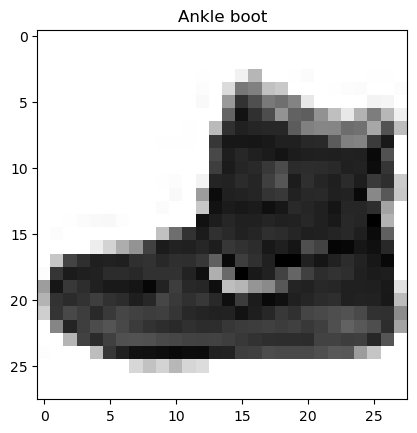

In [33]:
# Quick visualization
import matplotlib.pyplot as plt

idx = 0
plt.imshow(X_train[idx], cmap='binary')
plt.title(class_names[y_train[idx]])

### Creating the Model Using the Sequential API 

In [34]:
# random seed for reproducibility
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [37]:
# Model info
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


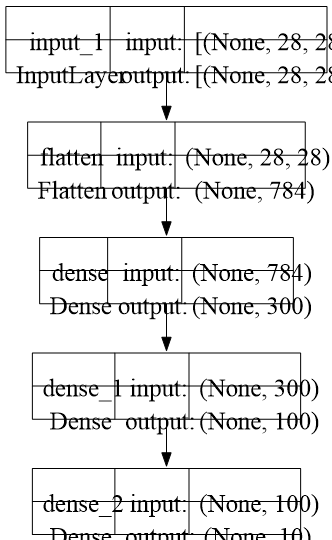

In [36]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [38]:
model.layers

In [39]:
hidden_layer = model.layers[1]
hidden_layer.name, hidden_layer.input_shape, hidden_layer.output_shape

('dense', (None, 784), (None, 300))

### Compile the Model

In [42]:
# Compiling the model to set the loss function, optimizer, and metrics
model.compile(
    loss='sparse_categorical_crossentropy',
    # stochastic gradient descent
    optimizer='sgd',
    metrics=['accuracy']
)

In [43]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 12s 6ms/step - loss: 0.7186 - accuracy: 0.7623 - val_loss: 0.5014 - val_accuracy: 0.8316
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4888 - accuracy: 0.8303 - val_loss: 0.4673 - val_accuracy: 0.8326
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4433 - accuracy: 0.8435 - val_loss: 0.4271 - val_accuracy: 0.8492
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4191 - accuracy: 0.8524 - val_loss: 0.3991 - val_accuracy: 0.8592
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3986 - accuracy: 0.8587 - val_loss: 0.3971 - val_accuracy: 0.8596
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3824 - accuracy: 0.8639 - val_loss: 0.3957 - val_accuracy: 0.8638
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3704 - accuracy: 0.8686 - val_loss: 0.3774 - val_accurac

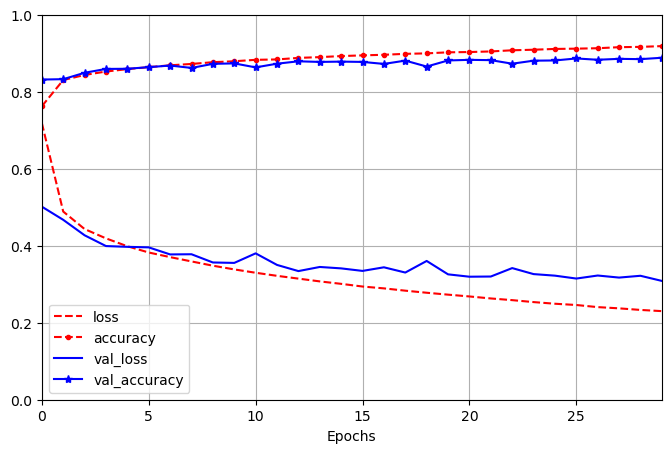

In [46]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=(0, 29), ylim=(0, 1), grid=True, xlabel='Epochs', style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [47]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3258 - accuracy: 0.8827


[0.32578781247138977, 0.8827000260353088]

## Building a Regression MLP Using the Sequential API

In [48]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [49]:
# Set the random seed for repro
tf.random.set_seed(42)

# We need a normalization layer
# It acts like StandardScaler (WARNING! - It needs to be fitted [using adapt method] before fitting the model)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

# Define the model 
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
# Choose the optimizer
# learning rate is a VERY important Hyperparameter
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Compile the model
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

# Fit the normalization layer
norm_layer.adapt(X_train)

# Fit the model
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 5s 9ms/step - loss: 0.8839 - root_mean_squared_error: 0.9402 - val_loss: 0.4321 - val_root_mean_squared_error: 0.6573
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3952 - root_mean_squared_error: 0.6287 - val_loss: 0.9802 - val_root_mean_squared_error: 0.9900
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3617 - root_mean_squared_error: 0.6014 - val_loss: 0.3242 - val_root_mean_squared_error: 0.5694
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3445 - root_mean_squared_error: 0.5870 - val_loss: 0.6241 - val_root_mean_squared_error: 0.7900
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3327 - root_mean_squared_error: 0.5768 - val_loss: 1.0146 - val_root_mean_squared_error: 1.0073
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3296 - root_mean_squared_error: 0.5741 - val_loss: 0.5452 - val_

In [50]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 155ms/step


In [52]:
rmse_test

0.5364809632301331

In [54]:
y_pred, y_test[:3]

(array([[0.41029465],
        [1.1116683 ],
        [5.2060647 ]], dtype=float32),
 array([0.477  , 0.458  , 5.00001]))

## Building Complex Models Using the Functional API

Sequential NNs are usefull but limit the topology of the NN. We can explore more complex NNs like a [a Wide & Deep
neural network]([https://](https://research.google/pubs/wide-deep-learning-for-recommender-systems/))

In [55]:
# Reset name counters and repro
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [56]:
# Define all the layers
normalization_layer = tf.keras.layers.Normalization()
hidden_layer_1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer_2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

In [57]:
# 'Link' the layers
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden_1 = hidden_layer_1(normalized)
hidden_2 = hidden_layer_2(hidden_1)
concat = concat_layer([normalized, hidden_2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [58]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 normalization (Normalizati  (None, 8)                    17        ['input_1[0][0]']             
 on)                                                                                              
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['normalization[0][0]']       
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']           

In [60]:
# Model compilation (+ previous steps)
learning_rate = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model
model.compile(loss='mse', optimizer=optimizer, metrics=["RootMeanSquaredError"])

# 'Fit' normalization layer BEFORE model training
normalization_layer.adapt(X_train)

history = model.fit(
    X_train, y_train, 
    validation_data=(X_valid, y_valid), 
    epochs=20, batch_size=32)

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 1.5473 - root_mean_squared_error: 1.2439 - val_loss: 0.5218 - val_root_mean_squared_error: 0.7223
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4766 - root_mean_squared_error: 0.6904 - val_loss: 0.6726 - val_root_mean_squared_error: 0.8201
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4107 - root_mean_squared_error: 0.6408 - val_loss: 0.3712 - val_root_mean_squared_error: 0.6093
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3870 - root_mean_squared_error: 0.6221 - val_loss: 0.3728 - val_root_mean_squared_error: 0.6105
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3729 - root_mean_squared_error: 0.6107 - val_loss: 0.4256 - val_root_mean_squared_error: 0.6524
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3604 - root_mean_squared_error: 0.6003 - val_loss: 1.1579 - val_